<a href="https://colab.research.google.com/github/rebbasujanitha/MLProjects/blob/main/Micro_Defaulter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Data file.csv to Data file.csv


In [15]:
import io
df=pd.read_csv(io.BytesIO(uploaded['Data file.csv']))
print(df)

        Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_d

In [16]:
df.shape

(209593, 37)

In [17]:
print("No. of Rows",df.shape[0])
print('No. of columns',df.shape[1])
pd.set_option('display.max_columns',None)
df.head()

No. of Rows 209593
No. of columns 37


,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


label	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
msisdn	mobile number of user
aon	age on cellular network in days
daily_decr30	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
daily_decr90	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
rental30	Average main account balance over last 30 days
rental90	Average main account balance over last 90 days
last_rech_date_ma	Number of days till last recharge of main account
last_rech_date_da	Number of days till last recharge of data account
last_rech_amt_ma	Amount of last recharge of main account (in Indonesian Rupiah)
cnt_ma_rech30	Number of times main account got recharged in last 30 days
fr_ma_rech30	Frequency of main account recharged in last 30 days
sumamnt_ma_rech30	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
medianamnt_ma_rech30	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
medianmarechprebal30	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
cnt_ma_rech90	Number of times main account got recharged in last 90 days
fr_ma_rech90	Frequency of main account recharged in last 90 days
sumamnt_ma_rech90	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
medianamnt_ma_rech90	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
medianmarechprebal90	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
cnt_da_rech30	Number of times data account got recharged in last 30 days
fr_da_rech30	Frequency of data account recharged in last 30 days
cnt_da_rech90	Number of times data account got recharged in last 90 days
fr_da_rech90	Frequency of data account recharged in last 90 days
cnt_loans30	Number of loans taken by user in last 30 days
amnt_loans30	Total amount of loans taken by user in last 30 days
maxamnt_loans30	maximum amount of loan taken by the user in last 30 days
medianamnt_loans30	Median of amounts of loan taken by the user in last 30 days
cnt_loans90	Number of loans taken by user in last 90 days
amnt_loans90	Total amount of loans taken by user in last 90 days
maxamnt_loans90	maximum amount of loan taken by the user in last 90 days
medianamnt_loans90	Median of amounts of loan taken by the user in last 90 days
payback30	Average payback time in days over last 30 days
payback90	Average payback time in days over last 90 days
pcircle	telecom circle
pdate	date


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

There are 21 float type of data and 13 integer type of data and 3 object type of data present in the dataset

In [19]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

we will perform simple feature engineering on 'pdate' column to create new columns for day,month and year

In [20]:
#converting Date datatype and splitting date into date,month and year
df['pdate']=pd.to_datetime(df['pdate'])
df['Day']=df['pdate'].apply(lambda x:x.day)
df['Month']=df['pdate'].apply(lambda x:x.month)
df['Year']=df['pdate'].apply(lambda x:x.year)

In [21]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Day,Month,Year
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,20,7,2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,10,8,2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,19,8,2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,6,6,2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,22,6,2016


In [22]:
#Droping pdate column 
df.drop(['pdate'],axis=1,inplace=True)

#### Data Integrity check

In [23]:
df.duplicated().sum() #This will check the duplicated values for all the columns

1

In [24]:
df.duplicated('msisdn').sum()

23350

There are 23350 rows with duplicated mobile number.
There is 1 row with completely duplicate values of all features.
Training model on duplicate values will effect accuracy model and additional it will increase computational resources consumption and computational time.

we will drop 1 row duplicate entry befor going further.

In [25]:
#droping duplicate entries
df.drop_duplicates(keep='last',inplace=True)

In [26]:
df.shape

(209592, 38)

#### check for presence of any whitespaces, '?','NA','-' in dataset

In [27]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

No missing data and White spaces present in the dataset

### Missing value check 

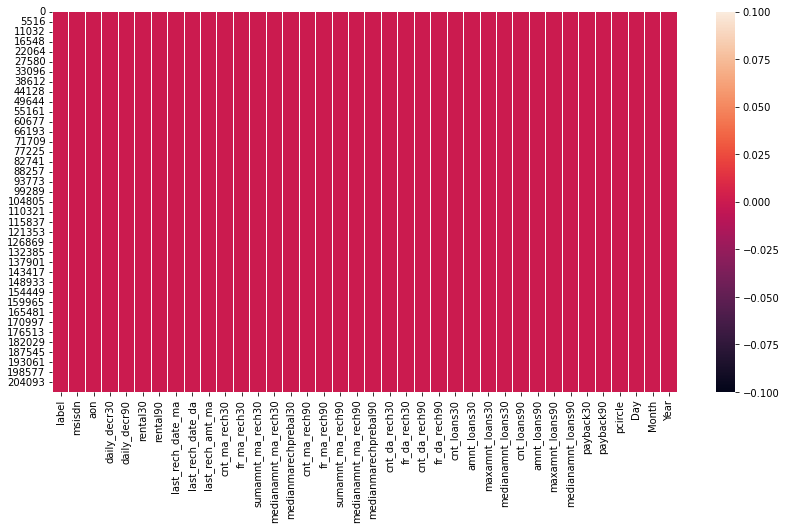

In [28]:
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull())

No missinfg  values present in the data

In [29]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month,Year
count,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.0
mean,0.875177,8112.380399,5381.412999,6082.529123,2692.578912,3483.407309,3755.865715,3712.220632,2064.458973,3.978053,3737.372947,7704.496570,1812.819258,3851.945862,6.315437,7.716812,12396.236149,1864.597375,92.025522,262.579362,3749.512336,0.041495,0.045713,2.758975,17.951992,274.660029,0.054029,18.520988,23.645397,6.703138,0.046078,3.398639,4.321302,14.398899,6.797321,2016.0
std,0.330519,75696.261220,9220.644093,10918.836919,4308.596841,5770.475034,53906.020204,53374.960145,2370.790003,4.256099,53643.752523,10139.645685,2070.869474,54006.502647,7.193487,12.590273,16857.832129,2081.685508,369.216539,4183.907920,53885.542905,0.397557,0.951388,2.554507,17.379778,4245.274734,0.218039,224.797957,26.469924,2.103869,0.200692,8.813330,10.307791,8.438899,0.741437,0.0
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,2016.0
25%,1.000000,246.000000,42.439500,42.691917,280.417500,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.000000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,6.000000,2016.0
50%,1.000000,527.000000,1469.091833,1500.000000,1083.540000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.000000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.000000,7.000000,2016.0
75%,1.000000,982.000000,7244.096000,7802.795000,3356.945000,4201.792500,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.000000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.000000,7.000000,2016.0
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.000000,8.000000,2016.0


In [30]:
df.describe(include=object)

,msisdn,pcircle
count,209592,209592
unique,186243,1
top,04581I85330,UPW
freq,7,209592


Observation.
For all features value of mean is greater than median, indicating skewness in features.
All data belong to year 2016. we can drop year column.
pcircle contain single unique value UPW, so we can drop this feature.
The features aon,daily_decr30.daily_decr90, rental30,last_rech_date_ma,last_rech_date_da,cnt_da_rech30,fr_da_rech30,last_rech_amt_ma,maxamnt_loans30,cnt_loans90,payback30,payback90 contain outliers as there are lot of difference in max columns and 75% columns.
aon,daily_decr30,daily_decr90,rental30,last_rech_date_ma,last_rech_date_da,medianmarechprebal90,medianmarechprebal30 features contain negative values in minimum column.
Maximum aon (Age on cellular network in days) observed is 999860.755168 and the minimum is -48

Data Cleaning
Here we will handle feature containing negative values.

aon negative values

### Data Cleaning

Here we will handle feature containing negative values.

### aon negative values

In [31]:
df['aon'].describe()

count    209592.000000
mean       8112.380399
std       75696.261220
min         -48.000000
25%         246.000000
50%         527.000000
75%         982.000000
max      999860.755168
Name: aon, dtype: float64

In [32]:
999860/365

2739.3424657534247

In [33]:
df[df['aon']<0].value_counts().sum()

1539

In [34]:
df[df['aon']>3650].value_counts().sum()#assume people stay one network for 10 years

2089

There are some negative values in minimum column while there is lot of difference between 75% and max column.Max values is 999860days which means 2739.34 year which is not possible at all.

There are 1539 entries with value less than 0.

So Feature aon contain error. To resolve this error we are going to handle upper limit through outlier removal.

There are lot of features which have negative values and higher max value compare to 75 percentile.There is need of some kind common Strategy to handle them based on certain assumption.
Strategy to handle data error in min and max column.
Assumption- All negative values are typing error happen accidentally by type - in front of original value (except feature depicting median).
Negative values are converted into absolute value to correct negative typing error whenever applicable except feature depicting median.
Upper limit of these features handle by outlier removal.


### Now we will convert all negative values into absolute values.

In [35]:
#converting all negative values to positive values in above column
df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr30'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['last_rech_date_da']=abs(df['last_rech_date_da'])

we have successfully converted negative values into positive values

#### Another data error contain in maxamnt_loans30 column

maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days

In [36]:
df['maxamnt_loans30'].describe()

count    209592.000000
mean        274.660029
std        4245.274734
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max       99864.560864
Name: maxamnt_loans30, dtype: float64

Maximum loan amount taken by customers can be 0,5,10 and which can be repay with amount of 0,6,12. we gone replace values greater than 12 into categeory of zero.

we are making assumption here that loan amount greater than 12 to be replace with zero.

In [37]:
#making values greater than 12 and assign value zeo to them.
df.loc[(df['maxamnt_loans30']!=6.0) & (df['maxamnt_loans30']!=12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0

In [38]:
df['maxamnt_loans30'].value_counts()

6.0     179192
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

Clearification on negative minimum values in 'medianmarechprebal30' and 'medianmarechprebal90'
medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

Comment :
The median of main account balance can be negative.
There are some very large positive values in the variable. These could be natural outliers.
Clearification on extreme max values in cnt_loans30 & cnt_loans90
cnt_loans30 : Number of loans taken by user in last 30 days

cnt_loans90 : Number of loans taken by user in last 90 days

Comment: There are no information about any restrictions on the number of times a customer can avail loans. Hence these extreme values can be considered as realistic.
Data is clean and error free now So we will import data in new CSV file and use new CSV file for further investigation.
Note :- Outliers will be removed in feature engineering section.

In [39]:
#saving error free data to new csv file with name Clean_data_file
df.to_csv('Clean_data_file.csv',sep=',',index=False)

In [40]:
#importing clean_data_file.csv through pandas
df=pd.read_csv('Clean_data_file.csv')

In [41]:
print('No.of Rows:',df.shape[0])
print('No. of columns:',df.shape[1])
pd.set_option('display.max_columns',None)
df.head()

No.of Rows: 209592
No. of columns: 38


,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Day,Month,Year
0,0,21408I70789,272.0,3055.050000,3055.050000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20,7,2016
1,1,76462I70374,712.0,12122.000000,12122.000000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10,8,2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19,8,2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6,6,2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22,6,2016


# EDA

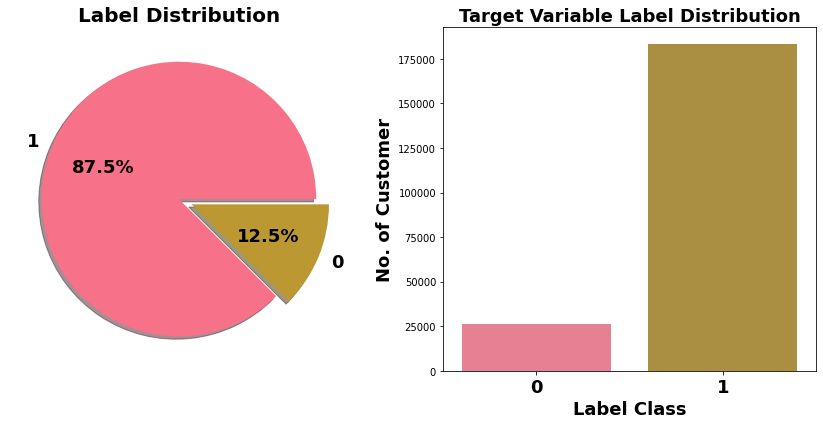

In [42]:
#Counting the number of defaulter and non-defaulter
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(12,6))

df['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Label Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot('label',data=df,ax=ax[1])
ax[1].set_title('Target Variable Label Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Label Class",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Customer",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

Label class 1 represent Non-defaulter while Label class 0 represent Defaulter i.e. Loan not paid
We can see Most of customers are Non-defaulter while very few are defaulter.
From ML model building point of view target variable is imbalanced data case.

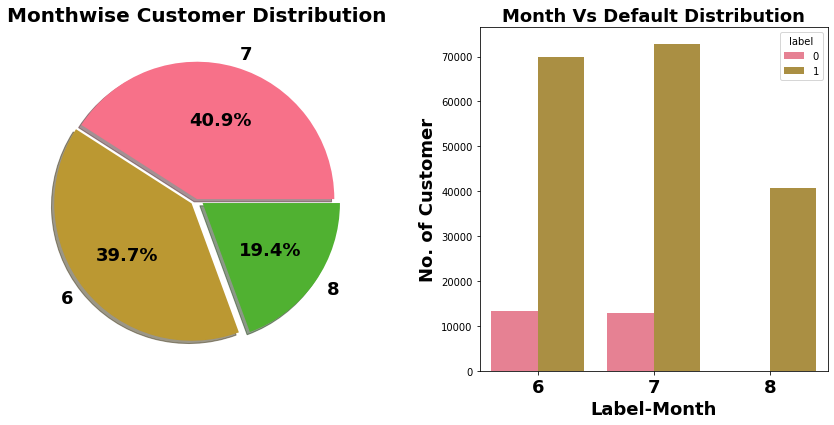

In [43]:
#Counting the number of defaulter and non-defaulter
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(12,6))

df['Month'].value_counts().plot.pie(explode=[0,0.05,0.05],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Monthwise Customer Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot('Month',hue='label',data=df,ax=ax[1])
ax[1].set_title('Month Vs Default Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Label-Month",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Customer",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

Comment :
Most of data belong to month 6 and 7, followed my month 8.
We can see very few defaulter in month 8.

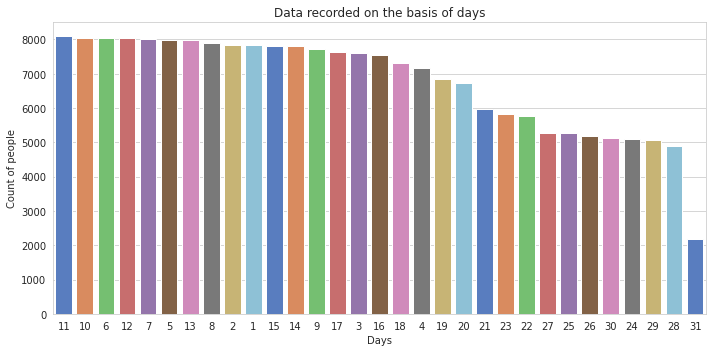

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(x='Day',data=df,palette='muted',order= df['Day'].value_counts().index)
plt.title('Data recorded on the basis of days')
plt.xlabel('Days')
plt.ylabel('Count of people')
plt.show()

No significant insight from the above plot

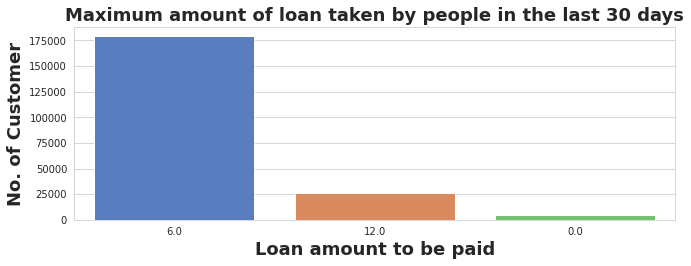

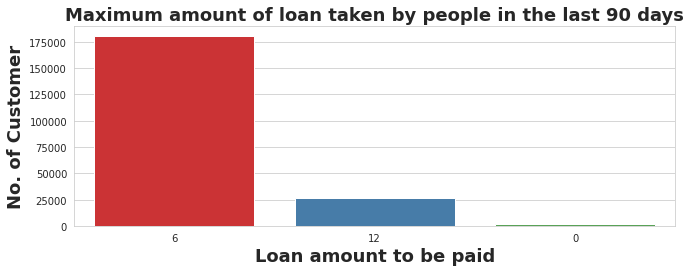

6.0     179192
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64


6     180944
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64


In [45]:
#Maximum amount of loan taken by people in last 30 and 90 days
plt.figure(figsize = (10,10))
plt.subplot(311)
sns.countplot(x='maxamnt_loans30',data=df,palette='muted',order=df['maxamnt_loans30'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Loan amount to be paid',fontsize=18,fontweight ='bold')
plt.ylabel('No. of Customer',fontsize=18,fontweight ='bold')
plt.show()

plt.figure(figsize = (10,10))
plt.subplot(312)
sns.countplot(x='maxamnt_loans90',data=df,palette='Set1',order=df['maxamnt_loans90'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 90 days',fontsize=18,fontweight ='bold')
plt.xlabel('Loan amount to be paid',fontsize=18,fontweight ='bold')
plt.ylabel('No. of Customer',fontsize=18,fontweight ='bold')
plt.show()
print(df['maxamnt_loans30'].value_counts())
print('\n')
print(df['maxamnt_loans90'].value_counts())

Observations:
In 30 days, maximum number of people had taken 6Rs as the loan amount and the number of people is 179192 whereas the number of people had not taken loan and their number is 4291.

In 90 days, maximum number of people had taken 6Rs as the loan amount and the number of people is 180944 whereas the number of people had not taken loan and their number is 2043.

Maximum number of people had taken 12Rs as the loan amount within 90 days and their number is 26605 whereas for 30 days the number of people who had taken 12Rs is 26109 respectively.

This means customer mostly opt for 6 Rs Loan.

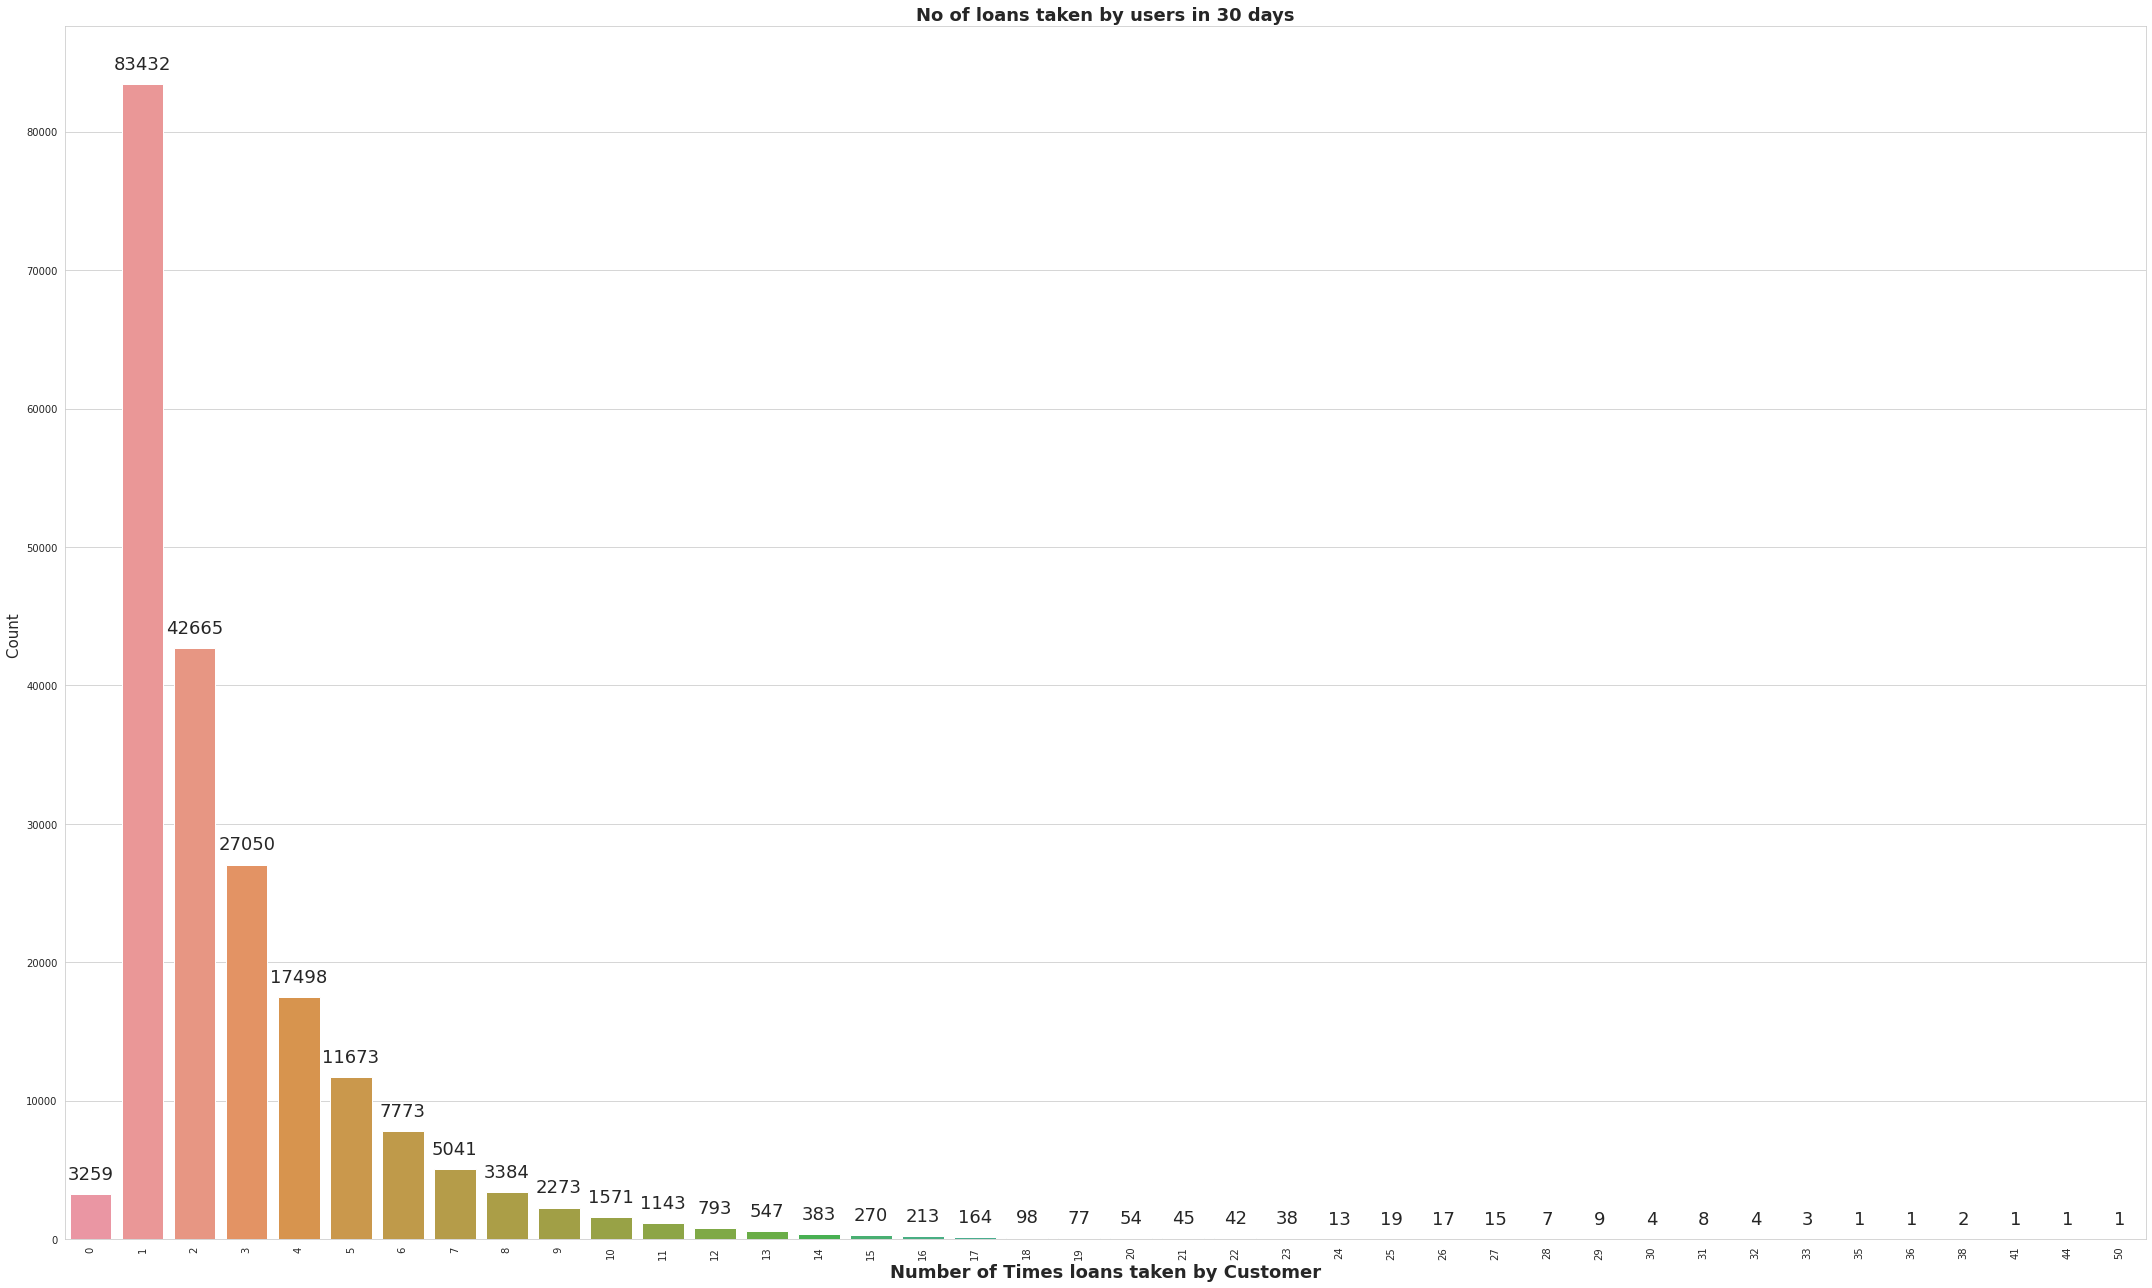

In [46]:
plt.figure(figsize=(30,18))
pd =sns.countplot(x = "cnt_loans30" ,  data=df)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=18, xytext = (0, 20), textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Number of Times loans taken by Customer",fontsize=18,fontweight ='bold')
plt.ylabel("Count " ,size=15)
plt.title ("No of loans taken by users in 30 days" ,fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()

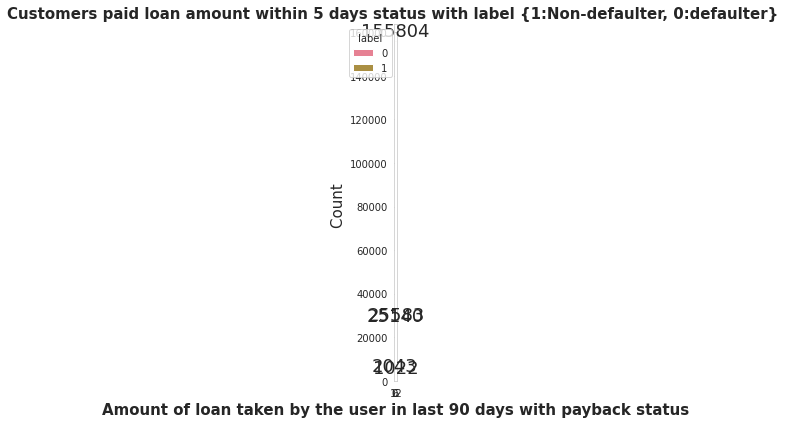

In [47]:
plt.figure(figsize=(8,6))
pd =sns.countplot(x = "maxamnt_loans90" ,  data=df  , hue= 'label')
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=18, xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Amount of loan taken by the user in last 90 days with payback status",fontsize=15,fontweight ='bold')
plt.ylabel("Count " ,size=15)
plt.title ("Customers paid loan amount within 5 days status with label {1:Non-defaulter, 0:defaulter} "
           ,fontsize=15,fontweight ='bold')
plt.tight_layout()
plt.show()

Very few defaulter in customers who take loan in amount of 12.

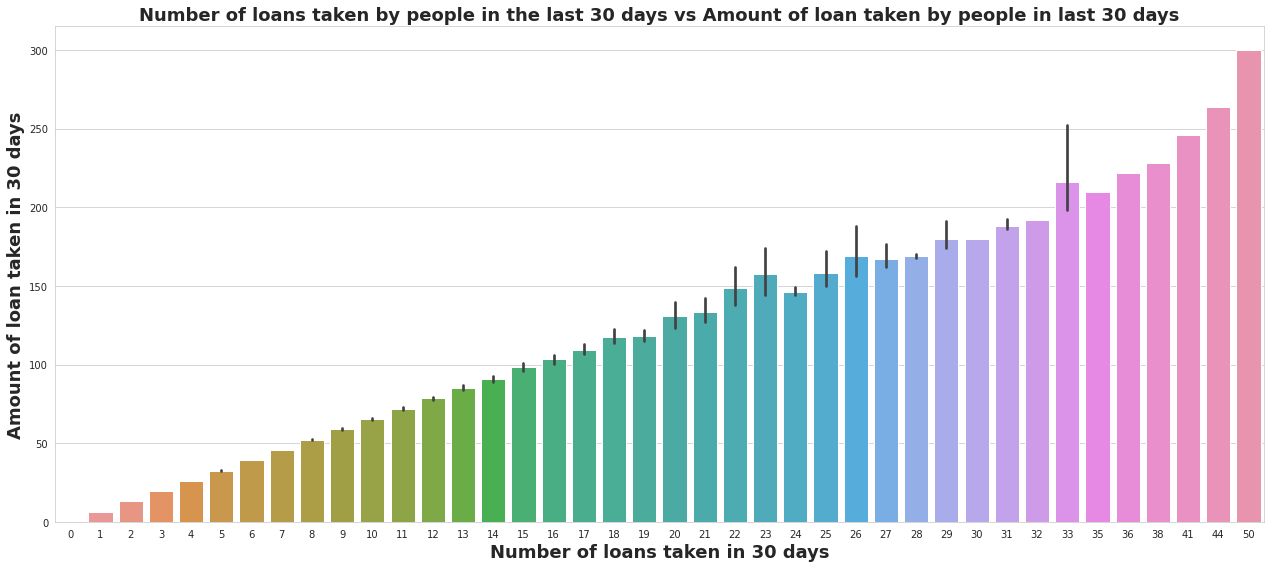

In [48]:
#Checking the number of loans taken by people in last 30 days vs Amount of loan taken by the people in last 90 days.
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='amnt_loans30', data=df)
plt.title('Number of loans taken by people in the last 30 days vs Amount of loan taken by people in last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Number of loans taken in 30 days',fontsize=18,fontweight ='bold')
plt.ylabel('Amount of loan taken in 30 days',fontsize=18,fontweight ='bold')
plt.show()

Maximum number of loans taken by the people is 50 and the Average loan amount is equivalent to 300.

Minimum number of loans taken by the people is 0.

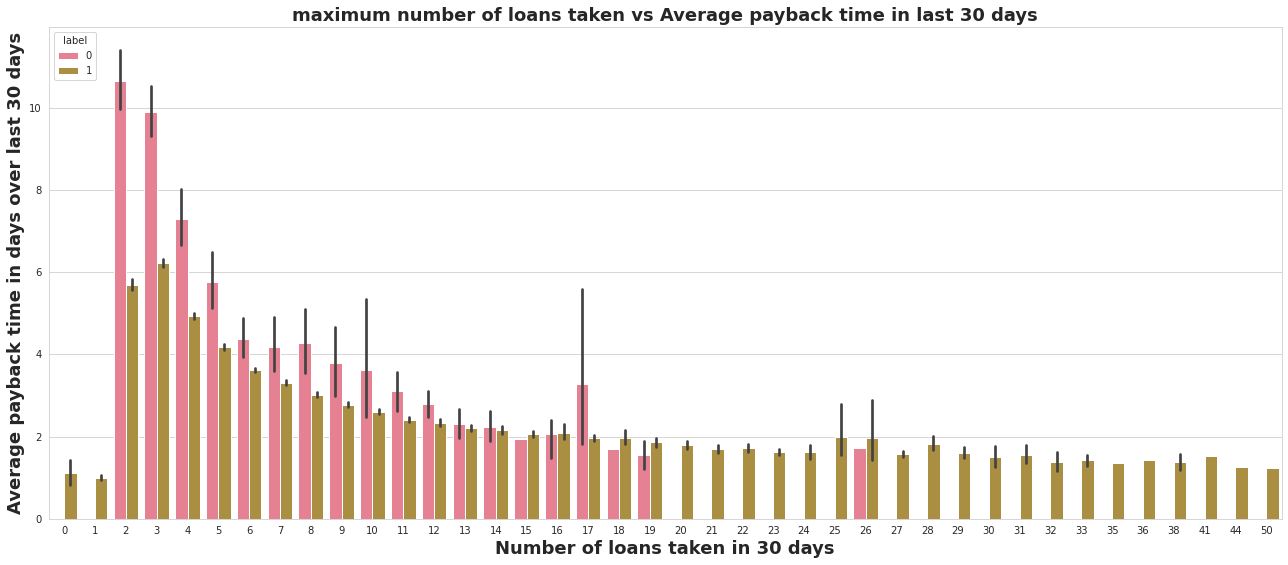

In [49]:
#Checking the maximum number of loans taken vs Amount payed within due dates by people or not on the basis of label
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='payback30',hue='label', data=df)
plt.title('maximum number of loans taken vs Average payback time in last 30 days',fontsize=18,fontweight ='bold')
plt.xlabel('Number of loans taken in 30 days',fontsize=18,fontweight ='bold')
plt.ylabel('Average payback time in days over last 30 days',fontsize=18,fontweight ='bold')
plt.show()

We can observe that the Average payback time over last 30 days is higher for people who had taken 2 times the loan and say that the users with less number of loan taking are more than the defaulters

<Figure size 1080x576 with 0 Axes>

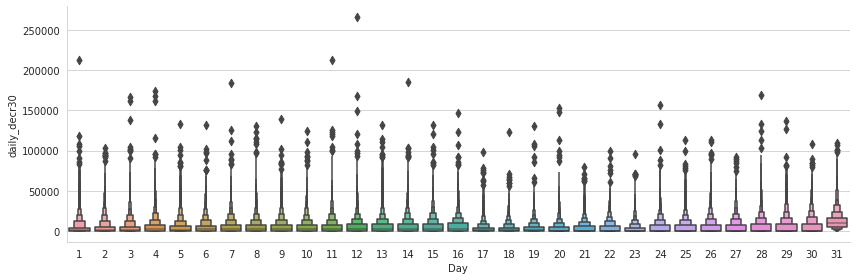

In [50]:
plt.figure(figsize=(15,8))
sns.catplot(y = "daily_decr30", x = "Day", data = df.sort_values("daily_decr30", ascending = False),
            kind="boxen", height = 4, aspect = 3)
plt.show()

# Feature Engineering

In [51]:
# As we have 37 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'Day', 'Month', 'Year'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], object: ['msisdn', 'pcircle']}

In [52]:
#Droping PCircle and msisdn column as they are unnecessary for further investigation
df.drop(['msisdn', 'pcircle'],axis=1,inplace=True)

As no variable with object datatype is present in database no need for any kind of encoding.

# 1. Outliers Detection and Removal

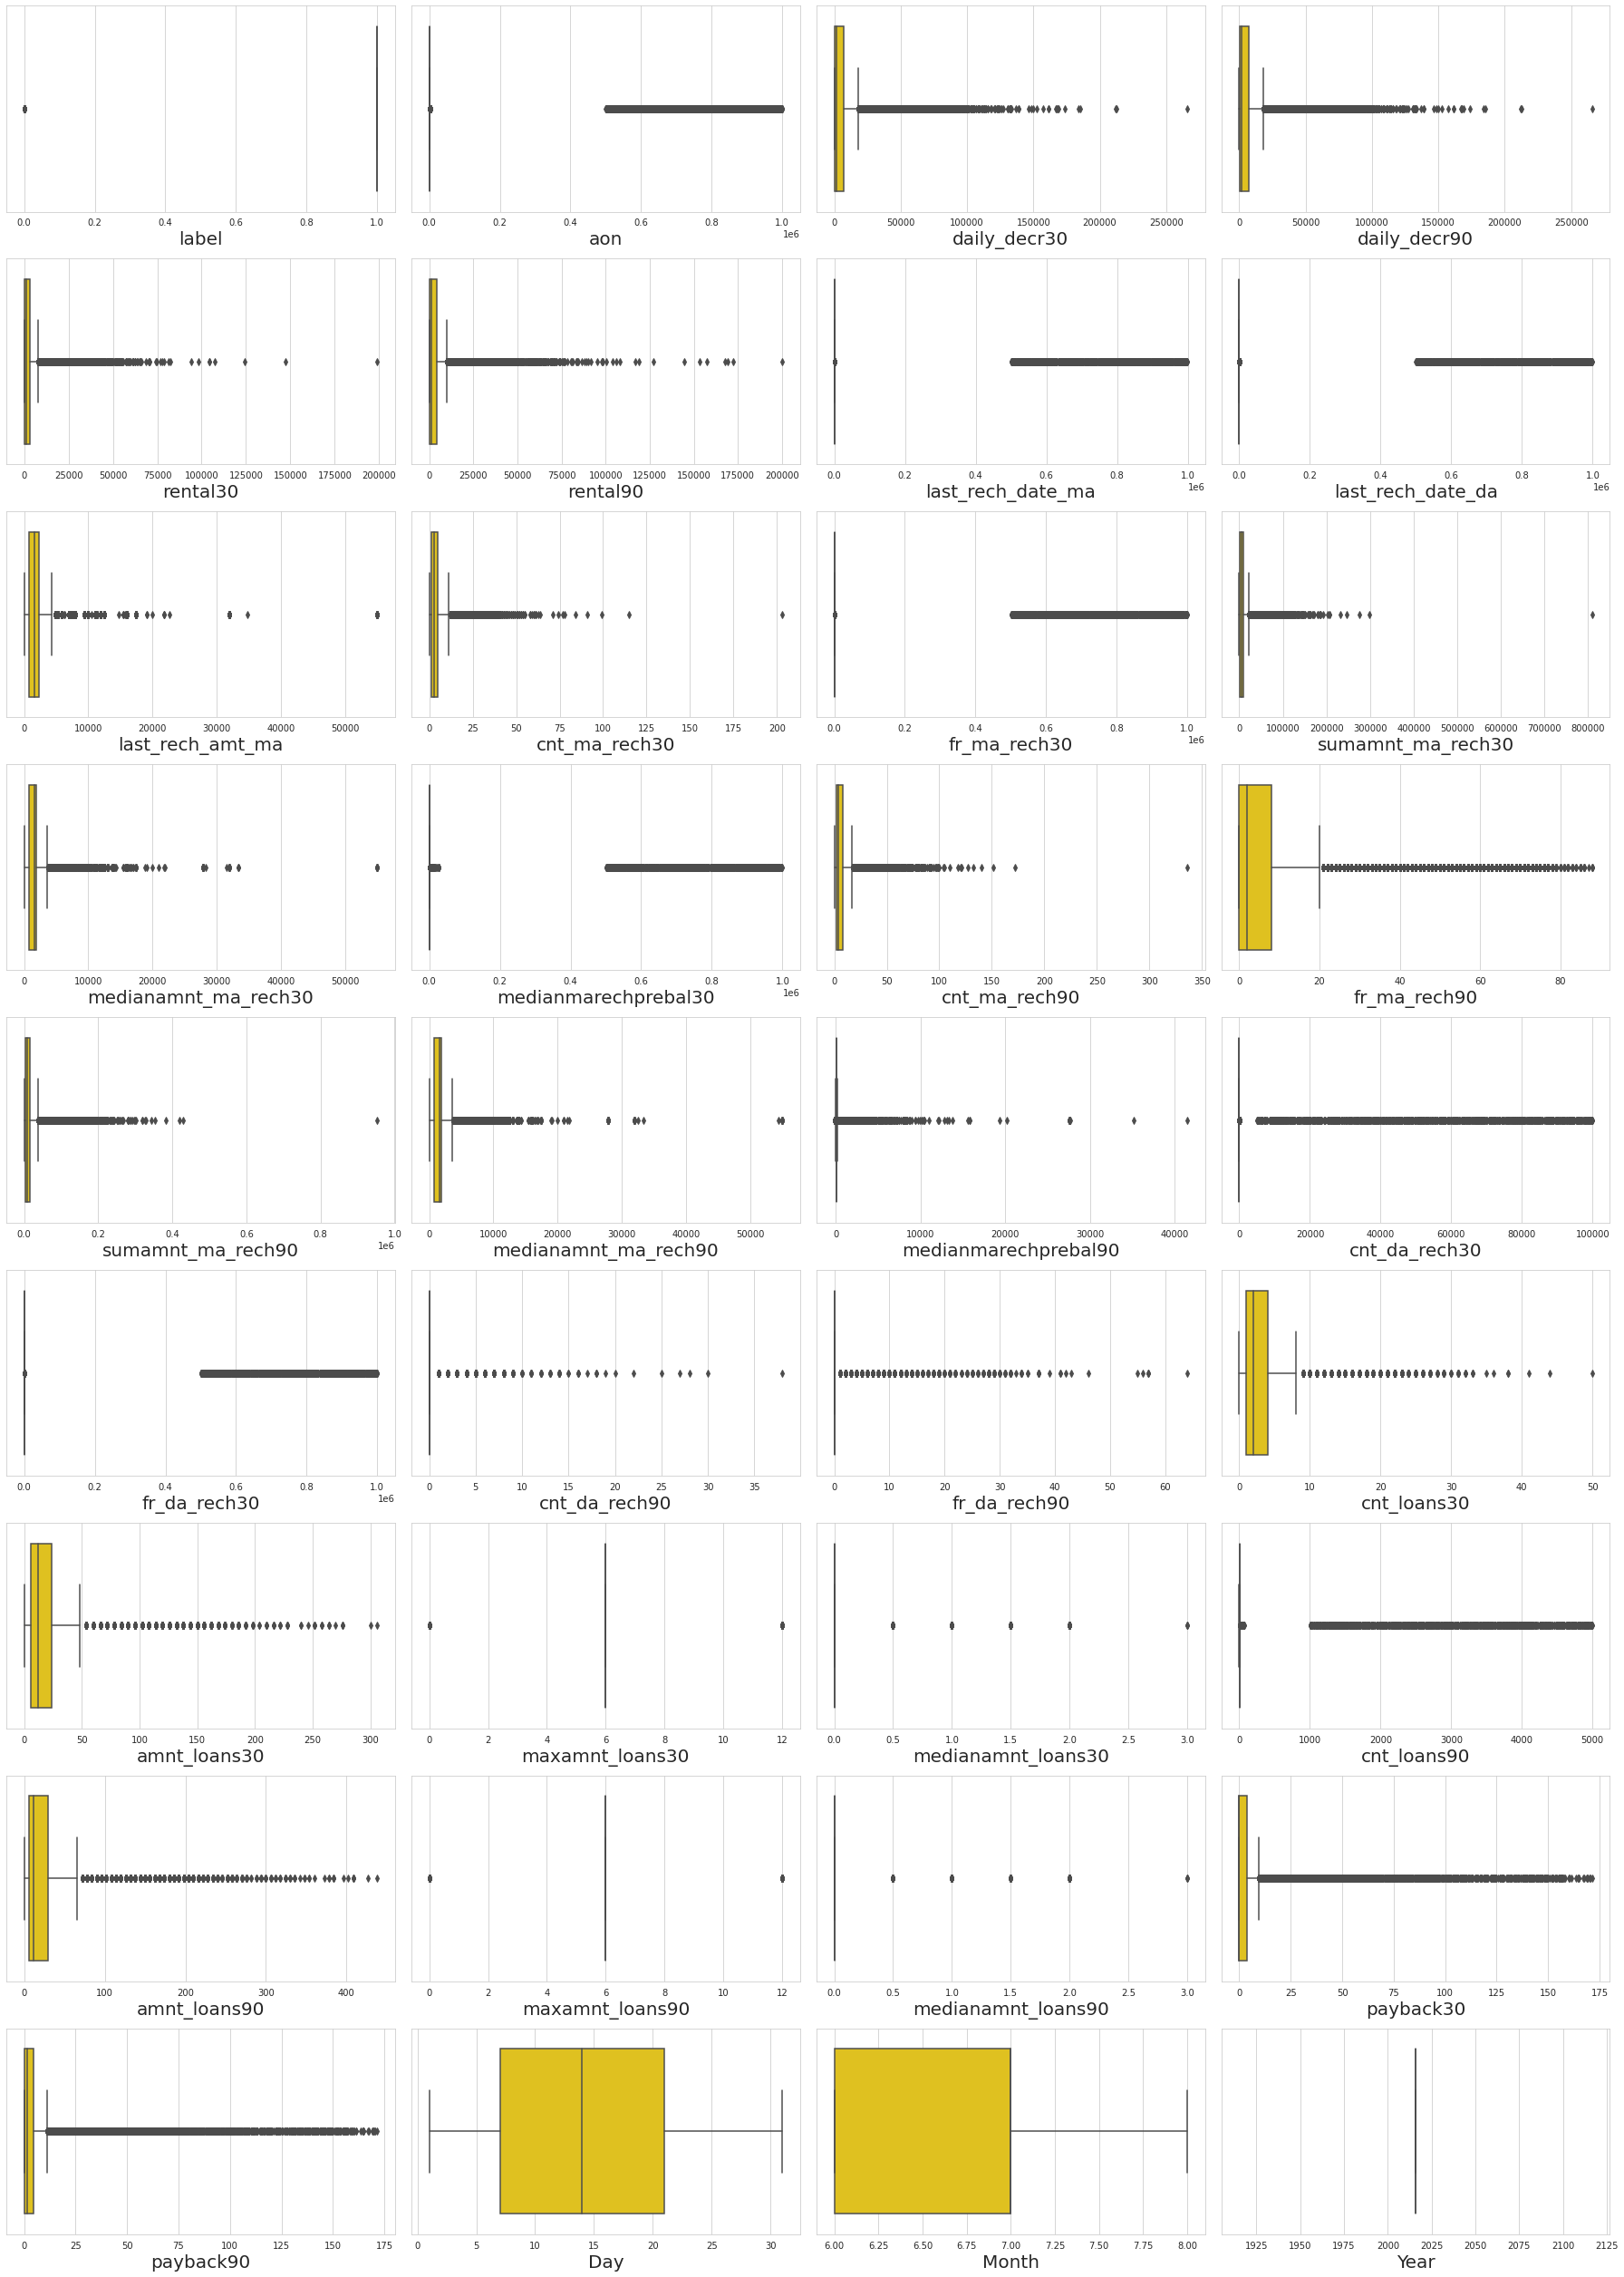

In [53]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

From Boxplot outliers exist in dataset.

# Outliers removal using Zscore method

In [54]:
#import dask.dataframe as dd
#df=dd.read_csv('Clean_data_file.csv')
df1=df.copy()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209592 entries, 0 to 209591
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209592 non-null  int64  
 1   aon                   209592 non-null  float64
 2   daily_decr30          209592 non-null  float64
 3   daily_decr90          209592 non-null  float64
 4   rental30              209592 non-null  float64
 5   rental90              209592 non-null  float64
 6   last_rech_date_ma     209592 non-null  float64
 7   last_rech_date_da     209592 non-null  float64
 8   last_rech_amt_ma      209592 non-null  int64  
 9   cnt_ma_rech30         209592 non-null  int64  
 10  fr_ma_rech30          209592 non-null  float64
 11  sumamnt_ma_rech30     209592 non-null  float64
 12  medianamnt_ma_rech30  209592 non-null  float64
 13  medianmarechprebal30  209592 non-null  float64
 14  cnt_ma_rech90         209592 non-null  int64  
 15  

In [56]:

from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df2 = df1[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df1.shape)
print ("Shape of the dataframe after removing outliers: ", df2.shape)
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-df2.shape[0])/df1.shape[0]*100)

df1=df2.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (209592, 36)
Shape of the dataframe after removing outliers:  (0, 36)
Percentage of data loss post outlier removal:  100.0


Huge amount of data loss in Z-score , which is not acceptable

Data loss naturally much higher in IQR compare to Z-score

AS outliers are present in upper bound,We need to employ some other outliers removal techinque here.

Comment :
There outliers exist in data.
There are no outliers in lower capping level.
So we will use Quantile-based Flooring and Capping technique.
We will Employ Quantile-based Flooring and Capping technique for outliers removal. In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 75th percentile) for the higher values

In [57]:
df.shape

(209592, 36)

In this dataset, we will set the flooring at 0th percentile for lower bound and capping at 99th percentile for upper bound.
Upper bound set as 99th percentile as most of values in dataset are realistic but still there are few very extreme values No Outliers in lower bound so Lower bound is set as 0th percentile.

In [58]:
df1=df.copy()
Q1 = df1.quantile(0)
Q3= df1.quantile(0.99)
IQR = Q3 - Q1
print(IQR)

label                       1.000000
aon                      2419.090000
daily_decr30            41730.620000
daily_decr90            41730.620000
rental30                19466.008500
rental90                26997.976500
last_rech_date_ma          57.000000
last_rech_date_da          56.000000
last_rech_amt_ma        10000.000000
cnt_ma_rech30              20.000000
fr_ma_rech30               26.000000
sumamnt_ma_rech30       46857.620000
medianamnt_ma_rech30    10000.000000
medianmarechprebal30     1531.545000
cnt_ma_rech90              33.000000
fr_ma_rech90               54.000000
sumamnt_ma_rech90       78717.270000
medianamnt_ma_rech90    10000.000000
medianmarechprebal90     1040.199700
cnt_da_rech30               1.000000
fr_da_rech30                0.000000
cnt_da_rech90               1.000000
fr_da_rech90                0.000000
cnt_loans30                12.000000
amnt_loans30               84.000000
maxamnt_loans30            12.000000
medianamnt_loans30          1.000000
c

In [59]:
data = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(198189, 36)


#### Data Loss

In [60]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((209592-198174)/209592)*100,'%')

Percentage Data Loss : 5.447727012481392 %


We have 5.44% of data Loss with Quantile-based Flooring and Capping Method which is within acceptable range.

Since outliers are removed we can move further

# 2. Skewness of features

In [61]:
data.skew()

label                   -2.272039
aon                      0.953323
daily_decr30             3.140242
daily_decr90             3.140242
rental30                 3.098194
rental90                 3.253848
last_rech_date_ma        3.474881
last_rech_date_da       10.002738
last_rech_amt_ma         2.298971
cnt_ma_rech30            2.353523
fr_ma_rech30             2.022729
sumamnt_ma_rech30        3.136283
medianamnt_ma_rech30     2.510680
medianmarechprebal30     6.370609
cnt_ma_rech90            2.582428
fr_ma_rech90             2.282874
sumamnt_ma_rech90        3.193925
medianamnt_ma_rech90     2.527898
medianmarechprebal90     5.601947
cnt_da_rech30           10.650848
fr_da_rech30             0.000000
cnt_da_rech90            7.349884
fr_da_rech90             0.000000
cnt_loans30              2.502144
amnt_loans30             2.644443
maxamnt_loans30          1.248506
medianamnt_loans30       4.534464
cnt_loans90              2.797034
amnt_loans90             2.876703
maxamnt_loans9

In [62]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Day', 'Month', 'Year'],
      dtype='object')

In [63]:
# Droping unncessary column
data.drop(['fr_da_rech30'],axis=1,inplace=True)
data.drop(['fr_da_rech90'],axis=1,inplace=True)

All features are skew except few one like day, month, fr_da_rech90,fr_da_rech30.

We will use PowerTransformer to transform skewness in features.

We will not perform on label as it is our Target Variable.

In [64]:
skew_fea=['aon','daily_decr30', 'daily_decr90', 'rental30','rental90','last_rech_date_ma', 'last_rech_date_da',
          'last_rech_amt_ma','cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30','medianamnt_ma_rech30', 
          'medianmarechprebal30', 'cnt_ma_rech90','fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
          'medianmarechprebal90', 'cnt_da_rech30','cnt_da_rech90', 'cnt_loans30', 'amnt_loans30',
          'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
          'maxamnt_loans90','medianamnt_loans90', 'payback30', 'payback90']

In [65]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [66]:
data[skew_fea] = scaler.fit_transform(data[skew_fea].values)

In [67]:
data.skew()

label                  -2.272039
aon                    -0.056862
daily_decr30           -0.130739
daily_decr90           -0.130739
rental30               -0.044555
rental90               -0.044533
last_rech_date_ma       0.041794
last_rech_date_da       6.421276
last_rech_amt_ma       -0.083881
cnt_ma_rech30          -0.001236
fr_ma_rech30            0.136332
sumamnt_ma_rech30      -0.313723
medianamnt_ma_rech30   -0.205950
medianmarechprebal30    1.287596
cnt_ma_rech90          -0.003740
fr_ma_rech90            0.143554
sumamnt_ma_rech90      -0.213327
medianamnt_ma_rech90   -0.066133
medianmarechprebal90    1.464802
cnt_da_rech30           9.681767
cnt_da_rech90           6.689093
cnt_loans30             0.037010
amnt_loans30            0.002722
maxamnt_loans30         0.427161
medianamnt_loans30      3.452249
cnt_loans90             0.097604
amnt_loans90           -0.008165
maxamnt_loans90         0.367016
medianamnt_loans90      3.782933
payback30               0.296355
payback90 

skewness of most features is reduced

# 3. Corrleation

In [68]:
data.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month,Year
label,1.000000,0.102189,0.268169,0.268169,0.144563,0.159710,0.067783,0.027734,0.263329,0.345223,0.245372,0.358901,0.279268,0.130761,0.362894,0.221341,0.368831,0.254801,0.120483,0.015627,0.024403,0.234163,0.232146,0.061500,0.046533,0.269467,0.263476,0.069320,0.036254,0.234474,0.242826,0.007948,0.155313,NaN
aon,0.102189,1.000000,0.118036,0.118036,0.084538,0.092418,0.066358,0.009564,0.099684,0.040846,0.073267,0.082976,0.099332,0.021890,0.062571,0.077415,0.101177,0.105077,0.017903,0.012720,0.020964,0.078111,0.078470,0.034058,-0.002303,0.118801,0.117083,0.040922,-0.009894,0.083224,0.113249,0.016150,0.086886,NaN
daily_decr30,0.268169,0.118036,1.000000,1.000000,0.581258,0.638004,0.126987,0.051975,0.377932,0.496381,0.300058,0.555219,0.390083,0.120138,0.627549,0.221836,0.664109,0.367405,0.081799,-0.000269,0.043640,0.340474,0.392375,0.298038,0.008697,0.495015,0.524533,0.320360,-0.029325,0.329648,0.405439,-0.011279,0.817026,NaN
daily_decr90,0.268169,0.118036,1.000000,1.000000,0.581258,0.638004,0.126987,0.051975,0.377932,0.496381,0.300058,0.555219,0.390083,0.120138,0.627549,0.221836,0.664109,0.367405,0.081799,-0.000269,0.043640,0.340474,0.392375,0.298038,0.008697,0.495015,0.524533,0.320360,-0.029325,0.329648,0.405439,-0.011279,0.817026,NaN
rental30,0.144563,0.084538,0.581258,0.581258,1.000000,0.973219,0.056509,0.016706,0.284311,0.455336,0.252924,0.479658,0.321875,0.078392,0.510597,0.165090,0.516980,0.272080,0.039530,0.012318,0.010536,0.309936,0.338690,0.207206,-0.023166,0.401726,0.415200,0.222072,-0.050597,0.309033,0.344341,0.097833,0.415062,NaN
rental90,0.159710,0.092418,0.638004,0.638004,0.973219,1.000000,0.090911,0.023855,0.295814,0.446864,0.255117,0.468576,0.313744,0.078856,0.538862,0.178953,0.543220,0.283180,0.042817,0.006739,0.016202,0.293149,0.326601,0.214280,-0.017929,0.415496,0.430739,0.234079,-0.050121,0.305948,0.361326,0.080109,0.503248,NaN
last_rech_date_ma,0.067783,0.066358,0.126987,0.126987,0.056509,0.090911,1.000000,0.033930,0.526446,-0.014372,0.061802,0.117960,0.328379,0.082484,0.104489,0.220971,0.256545,0.515385,0.130319,0.013826,0.033083,-0.105293,-0.107272,-0.021426,0.032963,-0.046284,-0.053919,-0.013562,0.026742,-0.097833,-0.025157,0.030730,0.077966,NaN
last_rech_date_da,0.027734,0.009564,0.051975,0.051975,0.016706,0.023855,0.033930,1.000000,0.025352,0.004658,0.015865,0.012825,0.019439,0.027079,0.010282,0.020498,0.019447,0.024973,0.031441,0.671517,0.961435,0.000558,0.003615,0.016614,0.007179,0.004677,0.006217,0.017392,0.004806,0.006210,0.023797,0.029242,0.037696,NaN
last_rech_amt_ma,0.263329,0.099684,0.377932,0.377932,0.284311,0.295814,0.526446,0.025352,1.000000,0.326780,0.278058,0.654878,0.813836,0.214719,0.378667,0.340013,0.704051,0.904383,0.230634,0.009284,0.023900,0.146131,0.164039,0.131172,0.036198,0.195199,0.201941,0.143677,0.023751,0.147066,0.184087,0.057129,0.154266,NaN
cnt_ma_rech30,0.345223,0.040846,0.496381,0.496381,0.455336,0.446864,-0.014372,0.004658,0.326780,1.000000,0.426265,0.858874,0.420269,0.147183,0.921504,0.226049,0.780071,0.292594,0.096308,-0.008783,0.002056,0.698575,0.693465,0.178450,-0.047782,0.694798,0.686620,0.183212,-0.062254,0.546135,0.491123,0.097385,0.191517,NaN


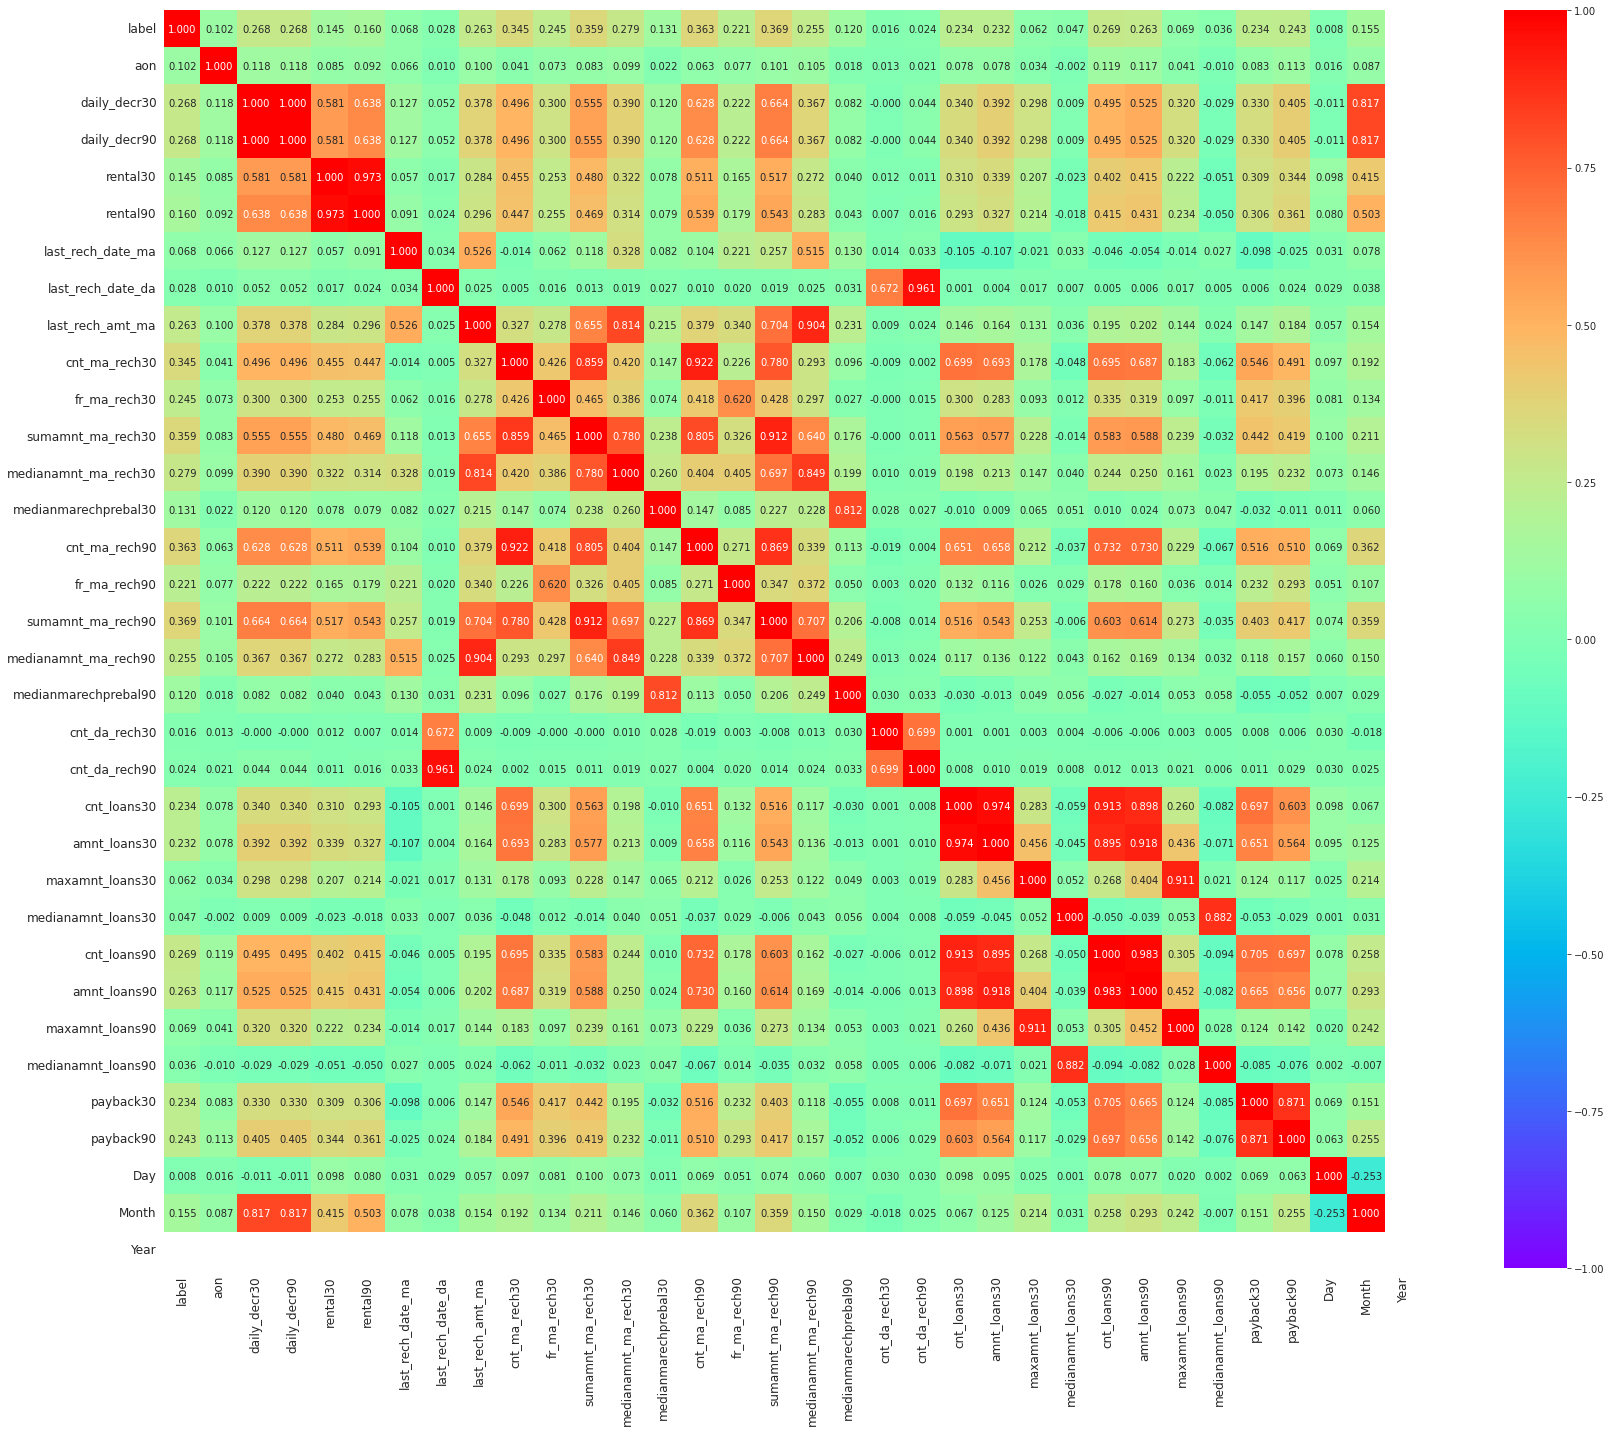

In [69]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="rainbow")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

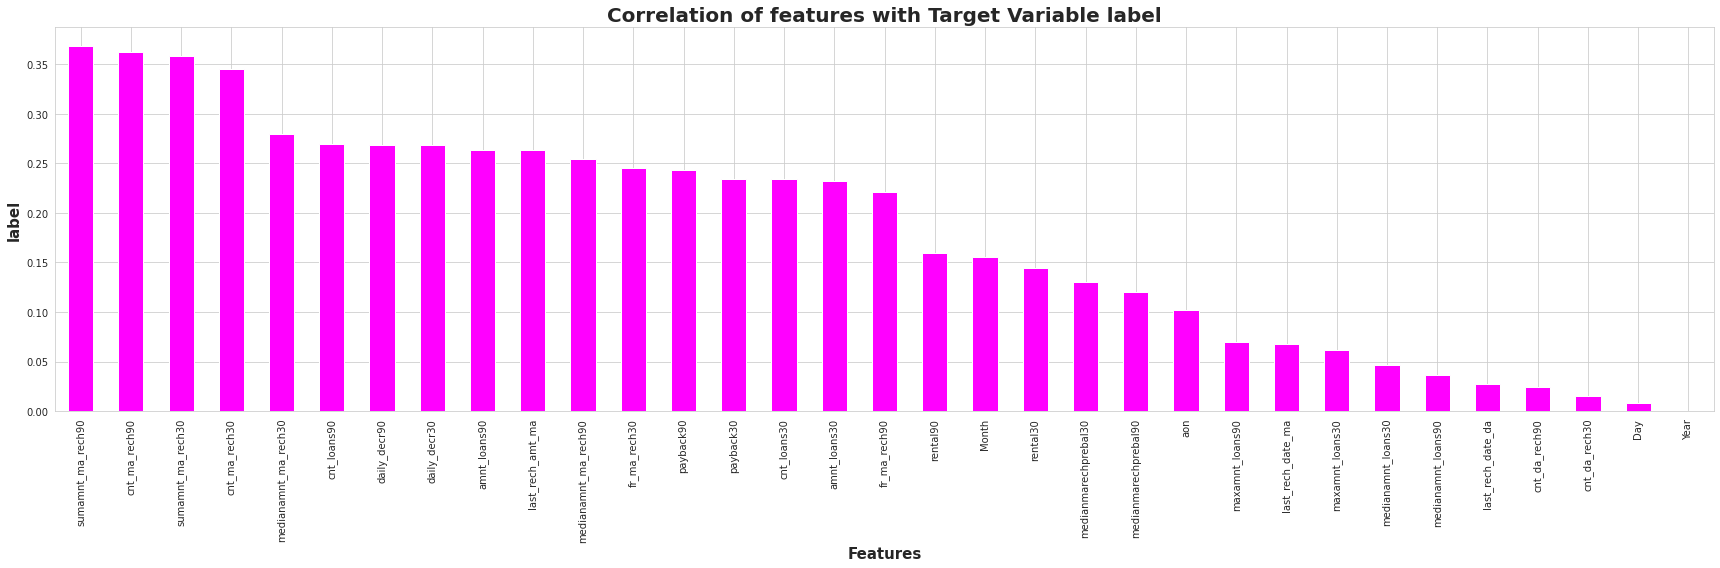

In [70]:
plt.figure(figsize = (24,8))
data.corr()['label'].drop(['label']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('label',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable label',fontsize = 20,fontweight='bold')
plt.show()

###  Standard Scaling

In [71]:
# Splitting data in target and dependent feature
X = data.drop(['label'], axis =1)
Y = data['label']
#X=data.astype(data.uint8)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

### Balancing using SMOTE

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
data.shape

(198189, 34)

In [75]:
X_scale.shape

(198189, 33)

In [76]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X_scale, Y = oversample.fit_resample(X_scale, Y)

In [77]:
Y.shape

(346952,)

Observation :
daily_decr30 and daily_decr90 are highly correlated with each other.
cnt_loans90 and amnt_loans90 are highly correlated with each other.
cnt_loans30 and amnt_loans30 are highly correlated with each other.
cnt_ma_rech30 and sumamnt_ma_rech30 are highly correlated with each other.
Strategy to Address Multicollinearity :
Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
Another way to address Multicollinerity is to Scaled Data and then apply PCA.
We will go by Second way for further investigation. As For most Independent feature VIF is exceed permissible limit of 10.

# PCA

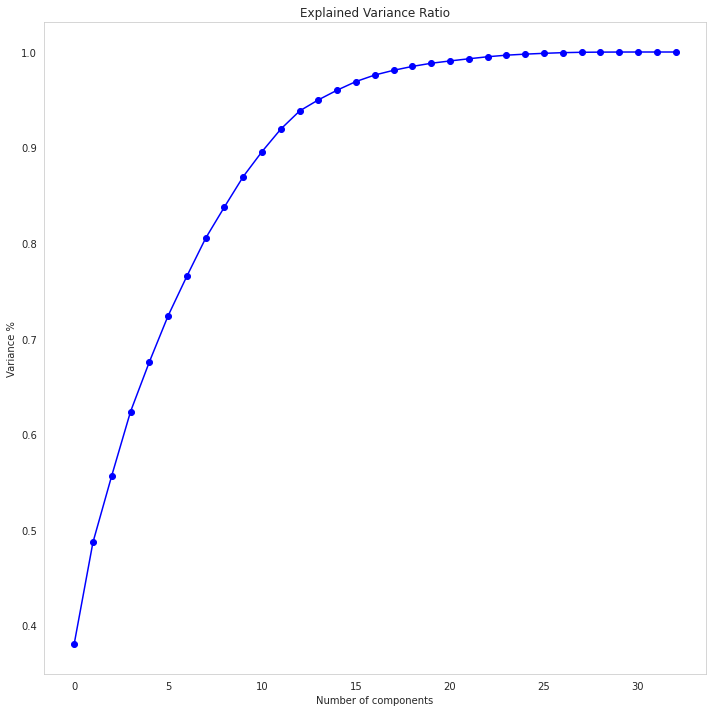

In [81]:
#plot the graph to find the principal components
from sklearn.decomposition import PCA
pca =PCA()
x_pca =pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Variance %')
plt.title('Explained Variance Ratio')
plt.grid()
plt.show()

AS per the graph, we can see that 12 principal components attribute for 90% of variation in the data. We shall pick the first 12 components for our prediction.

In [82]:
pca_new = PCA(n_components=11)
x_new = pca_new.fit_transform(X_scale)

In [87]:
import pandas as pd
principle_x=pd.DataFrame(x_new,columns=np.arange(11))

# Machine Learning Model Building

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (232457, 33)
Training target vector size: (232457,)
Test feature matrix size: (114495, 33)
Test target vector size: (114495,)


# 1. Logistic Regression

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=62, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7757107297261889


Confusion matrix of Logistics Regression : 
 [[45448 11499]
 [14181 43367]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.76      0.80      0.78     56947
           1       0.79      0.75      0.77     57548

    accuracy                           0.78    114495
   macro avg       0.78      0.78      0.78    114495
weighted avg       0.78      0.78      0.78    114495



In [91]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.7720886  0.77540315 0.77746073 0.77701398 0.77826776]
Mean CV Score : 0.7760468439494174
Std deviation : 0.002188558425158687


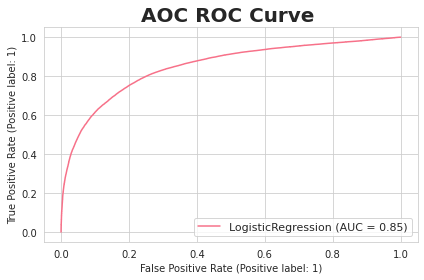

Auc Score :
 0.7758275119680148


In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(log_reg,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, log_reg.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# 2. Decision Tree Classifier

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=62, test_size=.33)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.8545351325385389


Confusion matrix of Decision Tree Classifier : 
 [[49908  7039]
 [ 9616 47932]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     56947
           1       0.87      0.83      0.85     57548

    accuracy                           0.85    114495
   macro avg       0.86      0.85      0.85    114495
weighted avg       0.86      0.85      0.85    114495



In [95]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, principle_x, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.86250378 0.86374314 0.86199741 0.86348177 0.8612192 ]
Mean CV Score : 0.8625890582305242
Std deviation : 0.000934096157898483


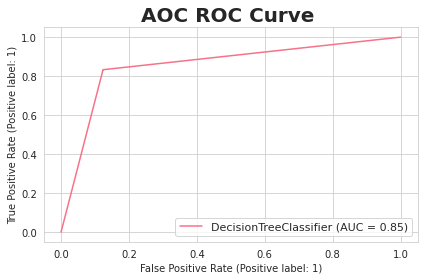

Auc Score :
 0.8546492727616217


In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dtc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, dtc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# 3. Random Forest Classifier

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=62, test_size=.33)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier Evaluation


Accuracy Score of Random Forest Classifier : 0.9174898467181973


Confusion matrix of Random Forest Classifier : 
 [[53147  3800]
 [ 5647 51901]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92     56947
           1       0.93      0.90      0.92     57548

    accuracy                           0.92    114495
   macro avg       0.92      0.92      0.92    114495
weighted avg       0.92      0.92      0.92    114495



In [100]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, principle_x, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.92530732 0.92746898 0.9256377  0.92540712 0.92604122]
Mean CV Score : 0.9259724664179373
Std deviation : 0.0007897329055074308


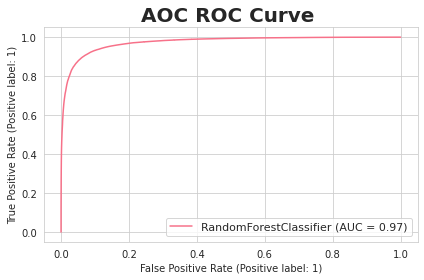

Auc Score :
 0.9175722531077514


In [101]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(rfc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, rfc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# 4. Extra Tree Classifier

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=62, test_size=.33)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'Extra Trees Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Extra Trees Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Extra Trees Classifier Evaluation


Accuracy Score of Extra Trees Classifier : 0.9331237171928906


Confusion matrix of Extra Trees Classifier : 
 [[54039  2908]
 [ 4749 52799]]


classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93     56947
           1       0.95      0.92      0.93     57548

    accuracy                           0.93    114495
   macro avg       0.93      0.93      0.93    114495
weighted avg       0.93      0.93      0.93    114495



In [105]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(etc, principle_x, Y, cv =5)
print('\033[1m'+'Cross Validation Score', etc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score ExtraTreesClassifier() :

CVScore : [0.94251416 0.94159185 0.93919873 0.94020752 0.94053898]
Mean CV Score : 0.9408102490099207
Std deviation : 0.0011443827834340847


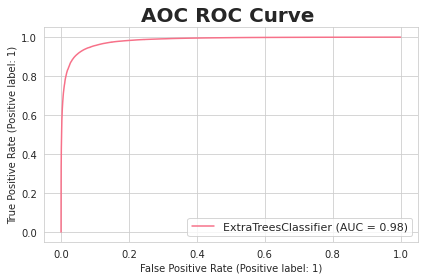

Auc Score :
 0.9332062792777329


In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(etc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, etc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

### Extra Tree classifier gives maximum accuracy and cross validation score.

In [108]:
from sklearn.model_selection import GridSearchCV
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'] }
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 1/5; 1/6] END criterion=gini, max_features=auto;, score=0.923 total time=  28.2s
[CV 2/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 2/5; 1/6] END criterion=gini, max_features=auto;, score=0.924 total time=  30.7s
[CV 3/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 3/5; 1/6] END criterion=gini, max_features=auto;, score=0.924 total time=  28.5s
[CV 4/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 4/5; 1/6] END criterion=gini, max_features=auto;, score=0.926 total time=  27.4s
[CV 5/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 5/5; 1/6] END criterion=gini, max_features=auto;, score=0.925 total time=  27.1s
[CV 1/5; 2/6] START criterion=gini, max_features=sqrt...........................
[CV 1/5; 2/6] END criterion=g

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=10)

In [109]:
GCV.best_params_

{'criterion': 'gini', 'max_features': 'sqrt'}

# Extra Tree Classifier model based on Hyper Parameter Tuning

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=62, test_size=.33)
etc=ExtraTreesClassifier(criterion='gini', max_features = 'auto')
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'Extra Trees Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Extra Trees Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Extra Trees Classifier Evaluation


Accuracy Score of Extra Trees Classifier : 0.9588803004498013


Confusion matrix of Extra Trees Classifier : 
 [[55457  1490]
 [ 3218 54330]]


classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     56947
           1       0.97      0.94      0.96     57548

    accuracy                           0.96    114495
   macro avg       0.96      0.96      0.96    114495
weighted avg       0.96      0.96      0.96    114495



We can see that hyper parameter tuning leads to increase in accuracy compare to default parameter from 0.9434 to 0.9445 . We will use New Extra tree classifer model final model.

In [111]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(etc, principle_x, Y, cv =5)
print('\033[1m'+'Cross Validation Score', etc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score ExtraTreesClassifier() :

CVScore : [0.94228358 0.94151979 0.93934284 0.94027958 0.93987606]
Mean CV Score : 0.9406603723782243
Std deviation : 0.0010834607907024003


# Final Model AOC ROC

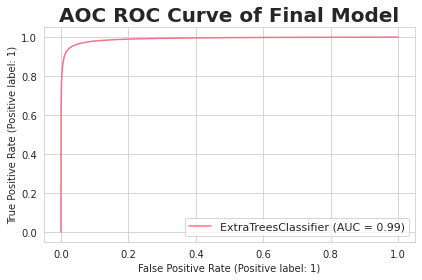

Auc Score :
 0.9589583914962926


In [112]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(etc,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, etc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

### Saving Final Model

In [113]:
import joblib
joblib.dump(etc,'Micro_Credit_Defaulter_Final.pkl')

['Micro_Credit_Defaulter_Final.pkl']

### Prediction Using Final Model

In [114]:
# Prediction
prediction = etc.predict(X_test)
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred

,Predicted Values,Actual Values
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
114490,0,0
114491,0,0
114492,0,0
114493,1,1
